**Nama : Maulana\
Bootcamp : DS36\
Final Project Data Analyst : Customer Segementation (RFM) - Retail Transaction**

##1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##2. Import Dataset

In [ ]:
df = pd.read_csv('Retail_Transactions_Dataset.csv')

df.head()

/tmp/ipython-input-983288208.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Retail_Transactions_Dataset.csv')


,Transaction_ID,Date,Customer_Name,Product,Total_Items,Total_Cost,Payment_Method,City,Store_Type,Discount_Applied,Customer_Category,Season,Promotion
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3.0,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2.0,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One)
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6.0,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1.0,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10.0,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43294 entries, 0 to 43293
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_ID     43294 non-null  int64  
 1   Date               43294 non-null  object 
 2   Customer_Name      43294 non-null  object 
 3   Product            43294 non-null  object 
 4   Total_Items        43294 non-null  int64  
 5   Total_Cost         43294 non-null  float64
 6   Payment_Method     43294 non-null  object 
 7   City               43294 non-null  object 
 8   Store_Type         43294 non-null  object 
 9   Discount_Applied   43294 non-null  bool   
 10  Customer_Category  43294 non-null  object 
 11  Season             43294 non-null  object 
 12  Promotion          28864 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(9)
memory usage: 4.0+ MB


In [ ]:
df['City'].nunique()


10

In [ ]:
df['City'].value_counts()


,count
City,
Boston,4379
Seattle,4378
Atlanta,4370
Los Angeles,4357
San Francisco,4355
Chicago,4353
Houston,4309
Dallas,4288
New York,4268


Insight :

Data understanding
- Jumlah baris: 891,211
- Jumlah kolom: 13
- Terdapat Missing values pada Promotion: ±298K rows hilang
- Perlu convert Date ke datetime

Goals:

Berdasarkan temuan pola penurunan penjualan dan retensi pelanggan yang rendah pada periode Mei 2022 – Mei 2024, analisis ini dilakukan untuk membantu perusahaan memahami perilaku pelanggan secara menyeluruh serta merancang strategi yang dapat meningkatkan loyalitas dan pendapatan bisnis. Untuk mencapai tujuan bisnis tersebut, diperlukan serangkaian pertanyaan analisis yang dapat membantu menggali pola perilaku pelanggan, mengidentifikasi segmen bernilai tinggi, serta memahami faktor yang memengaruhi penurunan penjualan dan retensi.
sebagai berikut :

1. Bagaimana tren penjualan dan jumlah pelanggan berubah dari waktu ke waktu?
2. Segmen pelanggan mana yang paling bernilai 3. berdasarkan hasil analisis RFM?
3. Pelanggan mana yang memberikan kontribusi terbesar terhadap total pembelian?
4. Segmen pelanggan mana yang memberikan kontribusi pendapatan terbesar?
5. Bagaimana tingkat retensi pelanggan dari waktu ke waktu berdasarkan analisis cohort?

##3. Data Dictionary

| Nama Kolom             | Deskripsi                                           |
|------------------------|-----------------------------------------------------|
|Transaction_ID           | ID unik untuk setiap transaksi yang dilakukan pelanggan
|Date            | Tanggal dan waktu transaksi terjadi
|Customer_Name        | Nama pelanggan yang melakukan transaksi
|Product       | Daftar produk yang dibeli dalam satu transaksi (berbentuk list string)
|Total_Items       | Jumlah item yang dibeli dalam transaksi tersebut
|Total_Cost          | Total pengeluaran pelanggan dalam satu transaksi (USD)
|Payment_Method          | Cara pembayaran yang digunakan (Cash, Credit Card, Mobile, dll.)
|City       | Kota tempat transaksi terjadi
|Store_Type                  | Jenis toko tempat transaksi dilakukan (Department, Warehouse Club, dll.)
|Discount_Applied                 | Apakah transaksi menggunakan diskon
|Customer_Category                | Kategori pelanggan (Professional, Homemaker, dll.)
|Season               | Musim ketika transaksi terjadi (Winter, Spring, dll.)
|Promotion              | Jenis promosi yang diterapkan pada transaksi



##4. Data Cleaning

In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Cek hasil
df['Date'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 303238 entries, 0 to 303237
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
303238 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.3 MB


In [ ]:
df.info()
df['Date'].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303238 entries, 0 to 303237
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Transaction_ID     303238 non-null  int64         
 1   Date               303238 non-null  datetime64[ns]
 2   Customer_Name      303238 non-null  object        
 3   Product            303237 non-null  object        
 4   Total_Items        303237 non-null  float64       
 5   Total_Cost         303237 non-null  float64       
 6   Payment_Method     303237 non-null  object        
 7   City               303237 non-null  object        
 8   Store_Type         303237 non-null  object        
 9   Discount_Applied   303237 non-null  object        
 10  Customer_Category  303237 non-null  object        
 11  Season             303237 non-null  object        
 12  Promotion          202100 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), 

,Date
0,2022-01-21 06:27:29
1,2023-03-01 13:01:21
2,2024-03-21 15:37:04
3,2020-10-31 09:59:47
4,2020-12-10 00:59:59


In [ ]:
df["Date"].dt.year.unique()


array([2022, 2023, 2024, 2020, 2021], dtype=int32)

Insight :

Semua transaksi sudah terformat datetime → siap untuk analisis tren penjualan per hari, bulan, kuartal, atau season.

Tidak ada missing value → tidak perlu imputasi.

Bisa digunakan untuk:

Analisis time series (tren penjualan, tren customer)

RFM Analysis di Power BI

Segmentasi berdasarkan season atau periode tertentu

In [ ]:
#cek missing value
df.isna().sum()


,0
Transaction_ID,0
Date,0
Customer_Name,0
Product,0
Total_Items,0
Total_Cost,0
Payment_Method,0
City,0
Store_Type,0
Discount_Applied,0


Insight:

Kolom Promotion memiliki 333.943 data kosong (~37% dari total transaksi).

Artinya, banyak transaksi tidak memiliki informasi promosi yang jelas.

Menghapus data ini akan menyebabkan kehilangan informasi besar dan potensi bias analisis.

Solusi terbaik: isi nilai kosong dengan “No Promotion” agar analisis penjualan tetap akurat dan bisa dipakai untuk dashboard & segmentasi.

In [ ]:
df['Promotion'].value_counts(dropna=False)


,count
Promotion,
NaN,333943
Discount on Selected Items,333370
BOGO (Buy One Get One),332687


Insight :

Distribusi tiga kategori hampir merata → bagus untuk perbandingan performa tiap promo.

Banyaknya missing di promo menunjukkan kemungkinan ketidakkonsistenan input data saat transaksi.

Bisa diuji apakah transaksi tanpa promo tetap laku → peluang upsell ketika diberi promo.

In [ ]:
#Handle missing value
df['Promotion_Available'] = df['Promotion'].notna()

#si missing value di Promotion dengan “No Promotion”
df['Promotion'] = df['Promotion'].fillna("No Promotion")

#cek hasil
print(df['Promotion'].value_counts())
print(df['Promotion'].isna().sum())


Promotion
No Promotion                  333943
Discount on Selected Items    333370
BOGO (Buy One Get One)        332687
Name: count, dtype: int64
0


Insight :

Kolom Promotion awalnya memiliki 333.943 missing values. Missing values tersebut diisi dengan label “No Promotion”. Selain itu, kolom baru bernama Promotion_Available ditambahkan untuk memudahkan identifikasi apakah suatu transaksi melibatkan promo atau tidak. Setelah pembersihan, tidak ada lagi nilai yang hilang pada kolom Promotion.

In [ ]:
#cek duplikat
df.duplicated().sum()


np.int64(0)

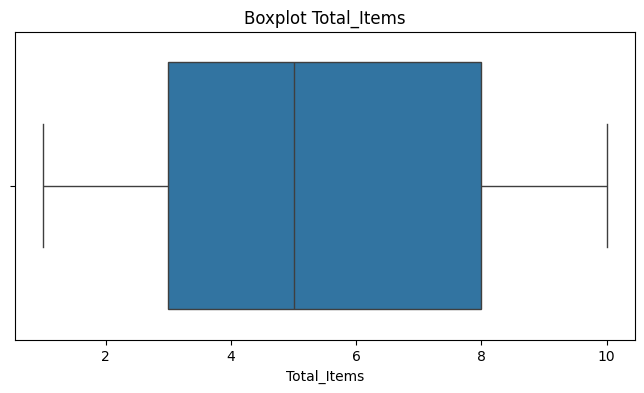

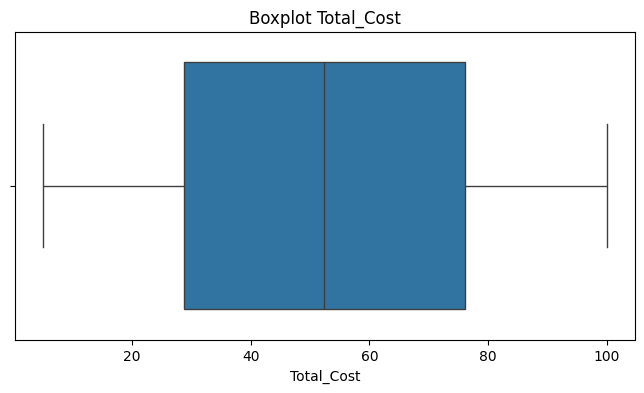

In [ ]:
#Cek outlier kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = ['Total_Items', 'Total_Cost']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
    plt.show()


Insight :

Data bersih dari outlier

Insight:

Kolom waktu yang diekstrak (Year, Month, Day, Week, Day_Name, Month_Name) siap mendukung analisis tren musiman, perilaku belanja per hari, dan pola mingguan pelanggan.

# 5. Exploratory Data Analysis (EDA)

## Trend Penjualan

In [ ]:
df = pd.read_csv("Retail_Transactions_Dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


In [ ]:
last_full_month = (df['Date'].max().to_period('M') - 1).to_timestamp()


In [ ]:
df_clean = df[df['Date'] <= last_full_month]


In [ ]:
monthly_sales = df_clean.resample('ME', on='Date')['Total_Cost'].sum()
monthly_sales


,Total_Cost
Date,
2020-01-31,1023565.45
2020-02-29,953488.19
2020-03-31,1015781.37
2020-04-30,988549.87
2020-05-31,1001696.33
2020-06-30,988630.18
2020-07-31,1012661.97
2020-08-31,1022764.43
2020-09-30,989218.28


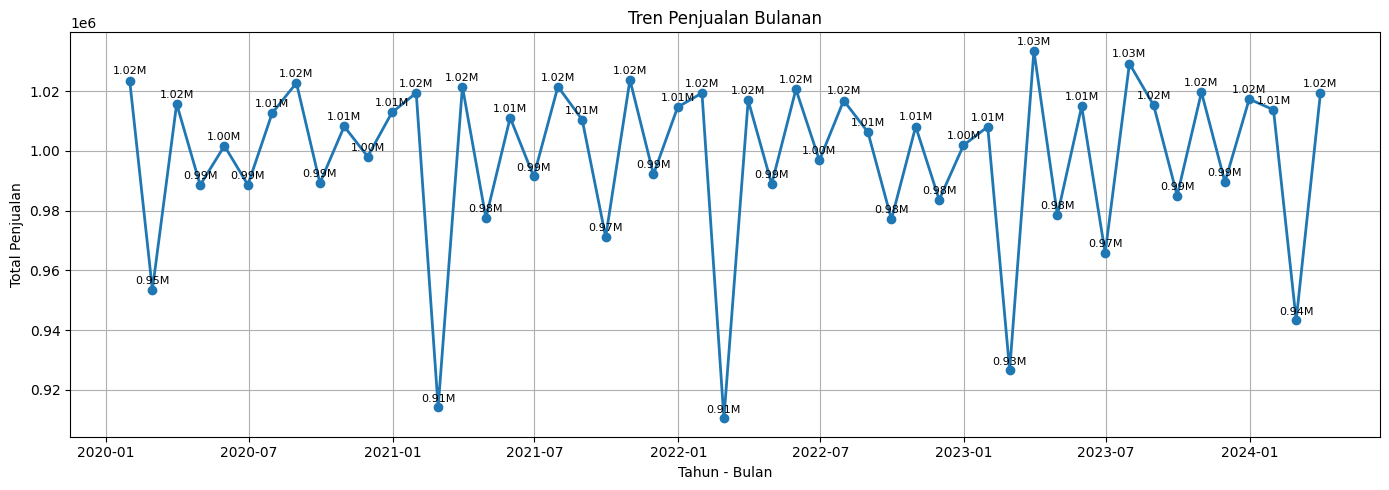

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(monthly_sales.index, monthly_sales.values,
         marker='o', linestyle='-', linewidth=2)

plt.title("Tren Penjualan Bulanan")
plt.xlabel("Tahun - Bulan")
plt.ylabel("Total Penjualan")
plt.grid(True)

# Data labels dekat titik
for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y + (y * 0.002), f"{y/1e6:.2f}M",
             ha='center', fontsize=8)

plt.tight_layout()
plt.show()


Insight :

Berdasarkan hasil analisis, penjualan bulanan berada pada kisaran USD 0.95M hingga 1.03M dan menunjukkan pola yang relatif stabil dari tahun 2020 hingga 2024. Meskipun terdapat beberapa penurunan kecil pada bulan-bulan tertentu, penjualan kembali naik dengan cepat, sehingga tidak terlihat gangguan signifikan pada performa bisnis. Stabilitas ini menunjukkan bahwa permintaan terhadap produk bersifat konsisten dan tidak terlalu dipengaruhi oleh kondisi musiman.

##Trend Customer Unik per Bulan

In [ ]:
monthly_customers = df_clean.resample('ME', on='Date')['Customer_Name'].nunique()
monthly_customers


,Customer_Name
Date,
2020-01-31,17418
2020-02-29,16420
2020-03-31,17269
2020-04-30,17016
2020-05-31,17092
2020-06-30,16949
2020-07-31,17289
2020-08-31,17344
2020-09-30,16894


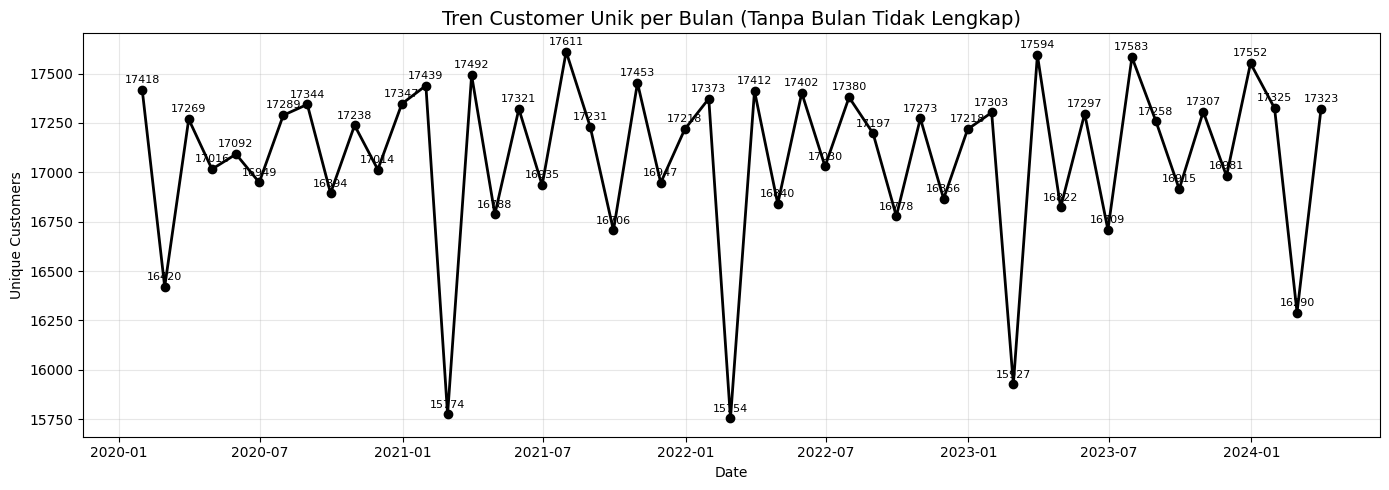

In [ ]:
plt.figure(figsize=(14,5))

plt.plot(
    monthly_customers.index,
    monthly_customers.values,
    marker='o',
    linestyle='-',
    linewidth=2,
    color='black'
)

plt.title("Tren Customer Unik per Bulan (Tanpa Bulan Tidak Lengkap)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Unique Customers")
plt.grid(True, alpha=0.3)

# Data labels (rapi, tidak terlalu jauh)
for x, y in zip(monthly_customers.index, monthly_customers.values):
    plt.text(
        x,
        y + (y * 0.002),
        str(int(y)),
        ha='center',
        fontsize=8
    )

plt.tight_layout()
plt.show()


Insight :

Berdasarkan hasil analisis, trend customer juga ikut terjadi pola penurunan yang sama di februari setiap tahunnya.

##Top 20 Customer Berdasarkan Spending

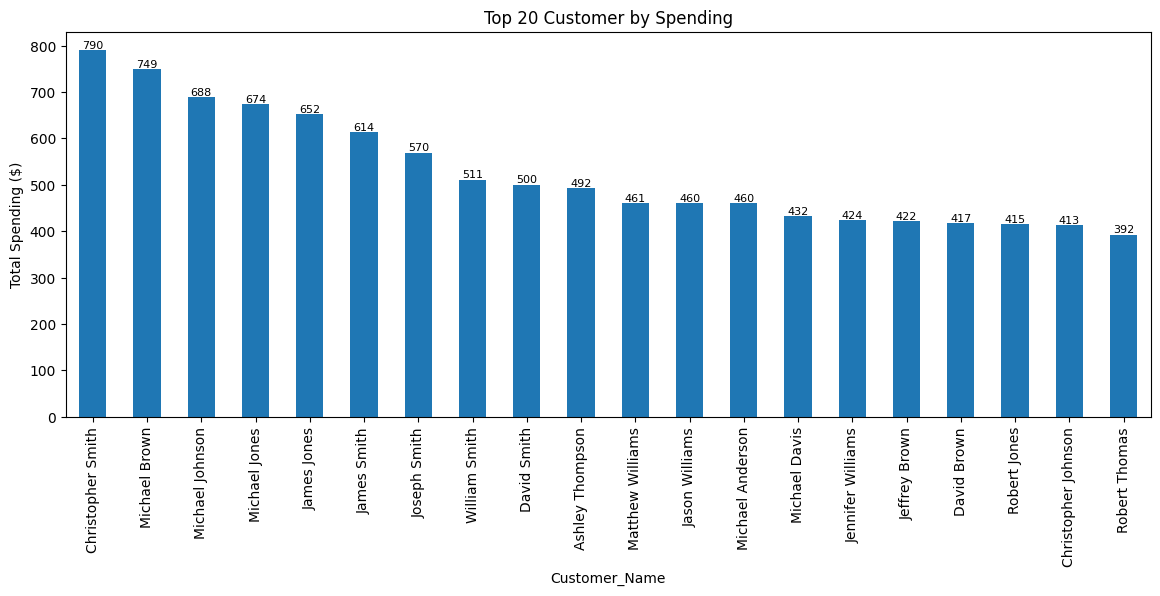

In [ ]:
top_customers = (
    df.groupby("Customer_Name")['Total_Cost']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

plt.figure(figsize=(14,5))
bars = top_customers.plot(kind='bar')
plt.title("Top 20 Customer by Spending")
plt.ylabel("Total Spending ($)")

# Data Labels
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=8
    )

plt.show()


Insight :

Analisis 20 customer dengan total belanja tertinggi menunjukkan bahwa spending terbesar berada pada kisaran USD 390 hingga 790. Tidak terdapat customer yang mendominasi secara ekstrem, sehingga kontribusi pendapatan bersifat merata. Temuan ini mengindikasikan bahwa bisnis tidak bergantung pada satu atau dua pelanggan besar, tetapi pada volume pelanggan yang banyak.


##Payment Method Distribution

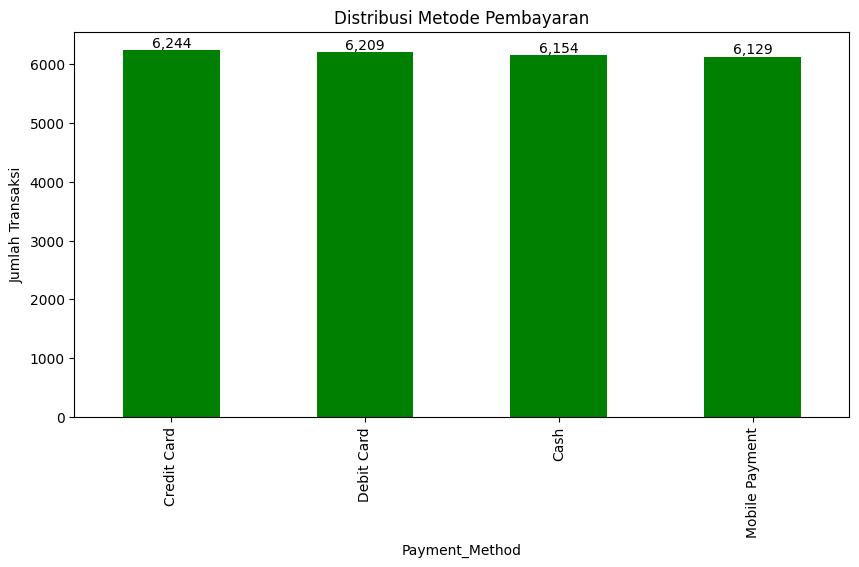

In [ ]:
payment_counts = df['Payment_Method'].value_counts()

plt.figure(figsize=(10,5))
bars = payment_counts.plot(kind='bar', color='green')
plt.title("Distribusi Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")

# Data Labels
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=10
    )

plt.show()


Insight :

Data transaksi menunjukkan bahwa metode pembayaran terdistribusi sangat merata, dengan Credit Card sedikit lebih tinggi (6.244 transaksi) di antara pilihan lainnya (Debit, Cash, dan Mobile Payment).

Meskipun metode pembayaran beragam, analisis histogram mengungkapkan bahwa mayoritas penjualan adalah dengan transaksi bernilai rendah dan bervolume tinggi, dengan kecenderungan pelanggan membeli jumlah unit yang sedikit. Secara teknis, proses StandardScaler telah berhasil meratakan skala semua fitur (Total, Unit price, dll.) ke rentang seragam, yang menjaga distribusi data asli dan memastikan data kini optimal untuk pemodelan prediktif.

##Store Type Revenue

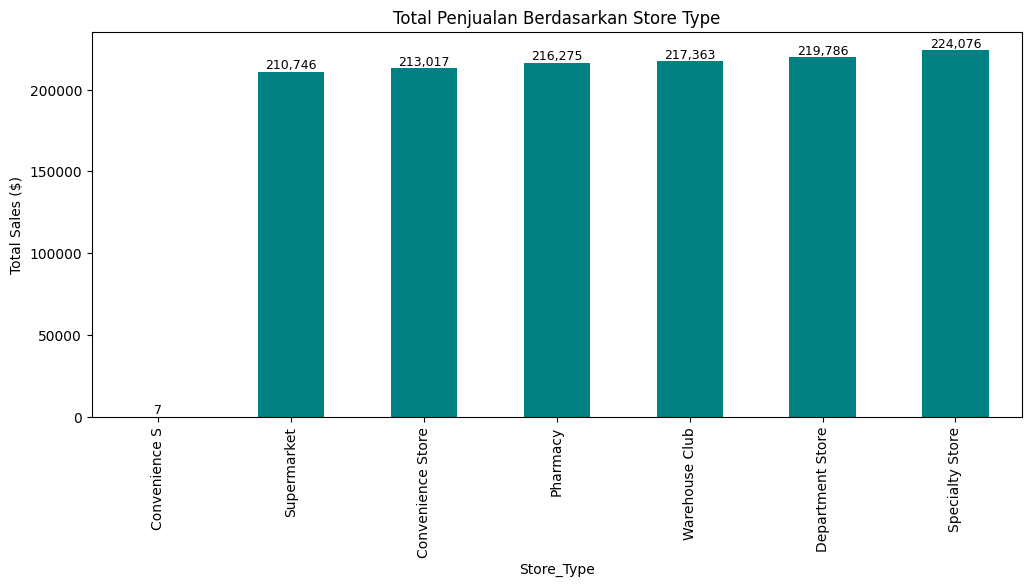

In [ ]:
store_sales = df.groupby("Store_Type")['Total_Cost'].sum().sort_values()

plt.figure(figsize=(12,5))
bars = store_sales.plot(kind='bar', color='teal')
plt.title("Total Penjualan Berdasarkan Store Type")
plt.ylabel("Total Sales ($)")

# Data Labels
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=9
    )

plt.show()


Insight :

Meskipun sebagian besar tipe toko memberikan kontribusi yang stabil, yaitu di atas 210K. Namun Specialty Store yang memberikan kontribusi paling tinggi. Dan juga perlu dilakukan audit pada Convenience Store karena bernilai $7 untuk mengidentifikasi apakah itu merupakan kesalahan input data atau indikator kegagalan operasional yang parah.

##Top 15 Kota Berdasarkan Revenue

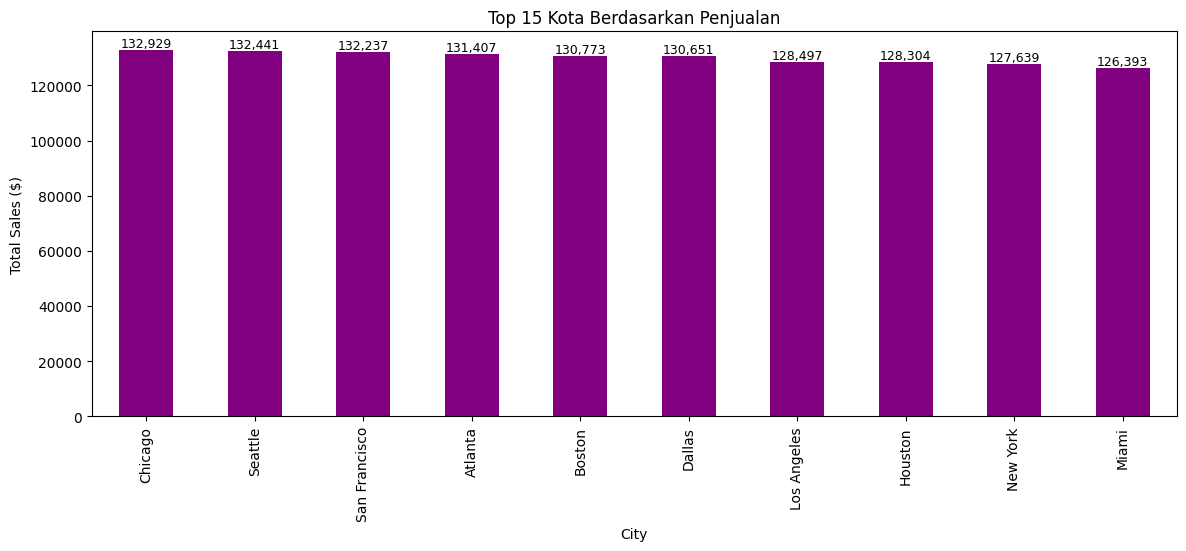

In [ ]:
city_sales = df.groupby("City")['Total_Cost'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14,5))
bars = city_sales.plot(kind='bar', color='purple')
plt.title("Top 15 Kota Berdasarkan Penjualan")
plt.ylabel("Total Sales ($)")

# Data Labels
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():,.0f}',
        ha='center', va='bottom', fontsize=9
    )

plt.show()


Insight :

Perusahaan harus memfokuskan pada optimalisasi di Specialty Store sebagai pemberi pendapatan utama dan mengalokasikan sumber daya lebih lanjut ke pasar Chicago dan Seattle. dan juga tim data harus mengaudit anomali pada tipe toko tertentu untuk memastikan integritas data seperti di type store convenience.

In [ ]:
df.to_csv("Retail_Transactions_Set.csv", index=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, 526511 to 407647
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Transaction_ID       1000000 non-null  int64         
 1   Date                 1000000 non-null  datetime64[ns]
 2   Customer_Name        1000000 non-null  object        
 3   Product              1000000 non-null  object        
 4   Total_Items          1000000 non-null  int64         
 5   Total_Cost           1000000 non-null  float64       
 6   Payment_Method       1000000 non-null  object        
 7   City                 1000000 non-null  object        
 8   Store_Type           1000000 non-null  object        
 9   Discount_Applied     1000000 non-null  bool          
 10  Customer_Category    1000000 non-null  object        
 11  Season               1000000 non-null  object        
 12  Promotion            1000000 non-null  object        
 13